In [1]:
import dlc_bci as bci
from utility import * 

## Get Data
Fetches the data from the server and saves it to a folder at the root 

In [2]:
train_input, train_target, test_input, test_target = import100HzData()
train_input_1000, train_target_1000, test_input_1000, test_target_1000 = import1000HzData()

<class 'torch.FloatTensor'> torch.Size([316, 28, 50])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 50])
<class 'torch.LongTensor'> torch.Size([100])
<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])


In [9]:
print(train_input.shape) 
print(train_target.shape) 
print(test_input.shape) 
print(test_target.shape) 

train_input=train_input.view(316, 28*50)
test_input=test_input.view(100, 28*50)

print(train_input.shape) 
print(train_target.shape) 
print(test_input.shape) 
print(test_target.shape) 

train_input_1000=train_input_1000.view(316, 28*500)
test_input_1000=test_input_1000.view(100, 28*500)


torch.Size([316, 1400])
torch.Size([316])
torch.Size([100, 1400])
torch.Size([100])
torch.Size([316, 1400])
torch.Size([316])
torch.Size([100, 1400])
torch.Size([100])


## SVM Regression Model 

In [15]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_input, train_target) #train by fitting the data
test_prediction = clf.predict(test_input) #prediction

## Accuracy - SVM

In [16]:
counter = 0
for i in range (0, len(test_prediction)):
    if test_prediction[i] == test_target[i]: 
        counter = counter + 1 
        
print('Accuracy = ' + str(counter/len(test_prediction)))

Accuracy = 0.49


## Logistic Regression Model with PCA 

No handles with labels found to put in legend.


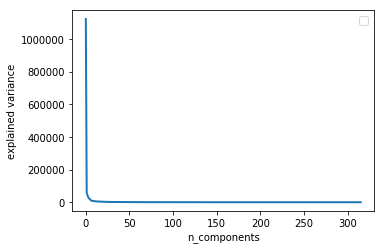

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_train = np.array(train_input)
Y_train = np.array(train_target)

# Plot the PCA spectrum
pca.fit(X_train)

plt.figure()
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained variance')

# Prediction
n_components = [5, 10, 15, 20]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, Y_train)

#plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            #linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

test_prediction = estimator.predict(test_input) #prediction

## Accuracy - LR + PCA

In [20]:
counter = 0
for i in range (0, len(test_prediction)):
    if test_prediction[i] == test_target[i]: 
        counter = counter + 1 
        
print('Accuracy =' + str(counter/len(test_prediction)))

Accuracy =0.47
